In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
# Load the Iris dataset (you can replace it with any other dataset)
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])


In [3]:
# For simplicity, we will use only two features (you can change this as needed)
X = data[['sepal length (cm)', 'sepal width (cm)']]

In [4]:
# Preprocessing: Standardize the data (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Create and fit the KMeans model
model = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters based on your requirement
model.fit(X_scaled)


C:\Users\rvign\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [6]:
# Add the cluster labels to the original dataset
data['cluster'] = model.labels_

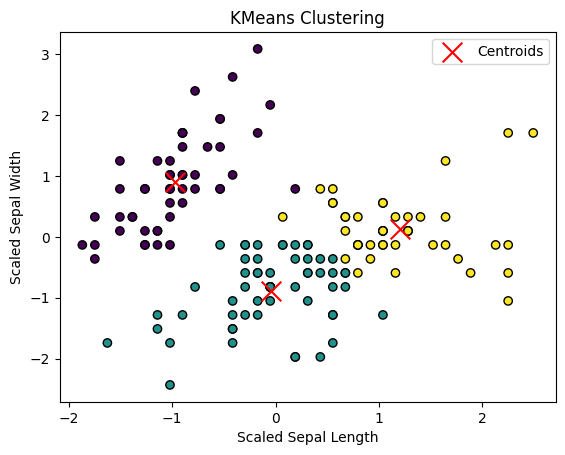

In [7]:
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['cluster'], cmap='viridis', edgecolor='k')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Scaled Sepal Length')
plt.ylabel('Scaled Sepal Width')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [8]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4388714430044551
